### Исследование данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
Перед вами данные до 2016 года. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

#### Цель исследования

1. Выявить определяющие успешность игры закономерности.
2. Составить портрет пользователя каждого региона.
3. Определить "срок жизни" игровой платформы.

#### Ход исследования

Данные будут выгружены из файла в датасет, будут проведены проверки на пропуски и дубликаты, пропуски будут заменены оптимальными для каждого столбца значениями, явные дубликаты будут удалены, типы данных будут заменены на более удобные, будет выбран актуальный перид для проведения исследований, будут построены и исследованы графики по продажам, будут изучены зависимости продаж от оценок критиков и пользователей, будет рассчитана общая сумма продаж, будет построен портрет пользователя каждого региона, будут проверены гипотезы о пользовательских рейтингах определенных платформ и жанров.

Этапы исследования:
1. Изучение общей информации
2. Преобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя
5. Проверка гипотез
6. Общий вывод

## Изучение общей информации

In [1]:
import pandas as pd # подключим необходимые модули
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv') # загрузим данные в датасет data

In [3]:
data.head(10) # выведем первые 10 строк датасета

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Сразу видим пропуски в столбцах *Critic_Score, User_Score, Rating*.

In [4]:
data.info() # посмотрим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Тип столбца *User_Score* следует заменить на *float64*.      

### Вывод

1. Данные были загружены в датасет *data*.
2. Некоторые столбцы (как минимум *Critic_Score, User_Score, Rating*) имеют пропуски.
3. В столбце *User_Score* следует заменить тип *object* на тип *float64*, так как все оценки являются числами.
4. Названия столбцов начинаются с большой буквы. Стоит заменить заглавные буквы на строчные в названиях столбцов для удобства.

## Предобработка данных

### Замена названий столбцов

In [5]:
data.columns = data.columns.str.lower() # приведем названия столбцов к нижнему регистру

### Работа с пропусками

In [6]:
data.isnull().sum() # проверим кол-во пропусков в каждом столбце

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски в столбцах *name* и *genre*, так как их всего по 2 штуки .

Пропуски в столбцах *year_of_release* также удалим, так как строки с таким пропуском составляют всего 1.6% от всего датасета.

Пропуски в столбцах *critic_score*, *user_score*, *rating* оставим как есть, т.к. их довольно много (поэтому не стоит их удалять) и нет оптимального значения, на которое можно было бы их заменить, не загрязнив датасет.

In [7]:
# заменим значение tbd на nan, чтобы в дальнейшем была возможность заполнить пропуски медианным значением
# tbs (to be determined - будет определено) - то есть на данный момент неизвестно, т.е. nan
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan 

In [8]:
# удалим пропуски в столбцах name, genre и year_of_release
data['name'] = data['name'].dropna()
data['genre'] = data['genre'].dropna()
data['year_of_release'] = data['year_of_release'].dropna()

### Преобразование типов

In [9]:
data['critic_score'].unique() # посмотрим, действительно ли все значения столбца critic_score - целые числа

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Все значения столбца *critic_score* действительно содержат только целые числа меньше *100*. В таком случае заменим тип столбца на *int8*.

In [10]:
# заменим тип данных user_score на float64
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

### Проверка на дубликаты

In [11]:
data[data.duplicated()]['name'].count() # проверим датасет на явные полные дубликаты

0

Полных явных дубликатов нет.

In [12]:
data.duplicated(subset=['name','platform', 'year_of_release']) # проверим датасет на явные неполные дубликаты

0        False
1        False
2        False
3        False
4        False
         ...  
16710    False
16711    False
16712    False
16713    False
16714    False
Length: 16715, dtype: bool

Нашлось 2 неполных явных дубликата. Удалим их.

In [13]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release']) # удаляем явные неполные дубликаты

In [14]:
# проверим датасет на неявные дубликаты
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.DataFrame(data=data['name'].sort_values().unique())

,0
0,Beyblade Burst
1,Fire Emblem Fates
2,Frozen: Olaf's Quest
3,Haikyu!! Cross Team Match!
4,Tales of Xillia 2
5,'98 Koshien
6,.hack//G.U. Vol.1//Rebirth
7,.hack//G.U. Vol.2//Reminisce
8,.hack//G.U. Vol.2//Reminisce (jp sales)
9,.hack//G.U. Vol.3//Redemption


Значений слишком много, чтобы делать выводы о точном отсутствии неявных дубликатов в  столбце *name*. При беглом просмотре дубликатов не обнаружено.

In [15]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

В столбце *genre* неявных дубликатов нет.

In [16]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Подозрительные значения проверены. Например, *3DO* и *3DS* - это разные платформы, а не дубликаты.
Дубликатов нет.

### Подсчет суммарных продаж

In [17]:
# добавим новый столбец со всеми продажами
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

### Проверка

In [18]:
# проверим, всё ли сработало
display(data.head(10))
print(f'Кол-во пропусков в data: {data.isnull().sum().sum()}')
data.dtypes

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Кол-во пропусков в data: 24737


name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
all_sales          float64
dtype: object

### Вывод

1. Названия столбцов были приведены к нижнему регистру.
2. Пропуски в столбцах *name, genre, year_of_release* были удалены.
3. В столбце *user_score* тип данных *object* был заменен на *float64*/
4. Была проведена проверка на явные полные и неполные дубликаты (по столбцам *name, platform, year_of_release*), а также на неявные дубликаты в столбцах *game, genre, platform*. Найденные 2 явных неполных дубликата были удалены.
5. В *data* был добавлен столбец *all_sales*, равный сумме продаж со всех регионов.
6. Была проведена проверка того, что все изменения сработали.

К пропускам в данных могли привести следующие причины:
1. Отсутствие полной информации о некоторых играх (давно вышедших или непопулярных).
2. Отсутствие определенного показателя для некоторых игр (рейтинга ESRB для игр, выпущенных в Азии, оценок пользователей и критиков для непопулярных игр).
3. Человеческий фактор (например, информация была случайно удалена оператором).

## Исследовательский анализ данных

### Подсчет количества игр по годам

In [19]:
data.groupby('year_of_release')['name'].count() # посмотрим, сколько игр выпускалось в разные годы

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     652
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

Глядя на данные, можно выделить несколько областей:

Период    | Кол-во выпущенных игр
:-------- | :-------------------
1980-1993 | на одном уровне
1993-2000 | медленно возрастает
2000-2008 | резко возрастает
2008-2012 | резко снижается
2012-2016 | на одном уровне

Имеет смысл рассматривать данные за период не ранее 2012 года.

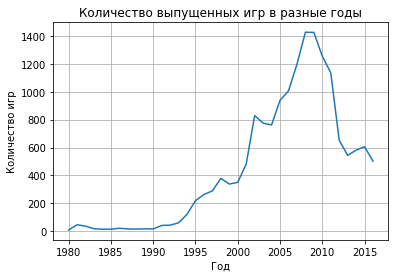

In [20]:
# построим график для наглядности
data.groupby('year_of_release')['name'].count().plot(grid=True)
plt.title('Количество выпущенных игр в разные годы')
plt.ylabel('Количество игр')
plt.xlabel('Год')
plt.show()

### Анализ продаж по платформам

In [21]:
# выберем платформы с максимальными суммарными продажами
data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.64
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.74
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64

Для исследования возьмем 6 наиболеее успешных с точки зрения продаж платформ: *PS2, X360, PS3, Wii, DS, PS*.

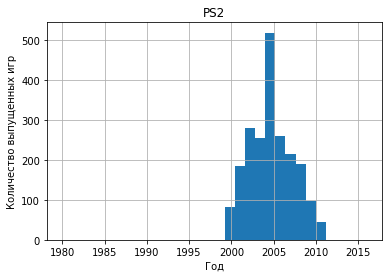

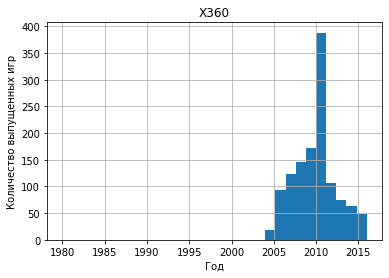

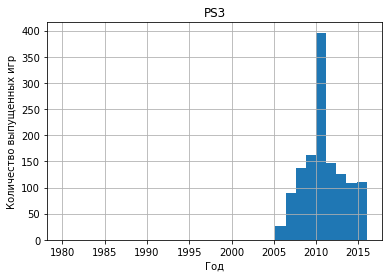

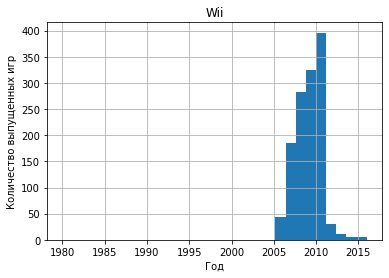

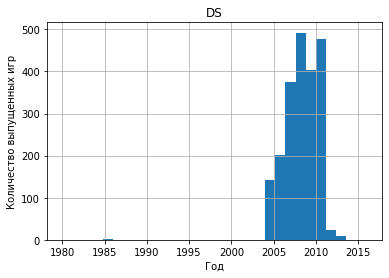

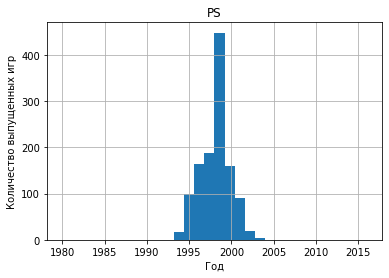

In [22]:
# посмотрим, за какой характерный срок появляются новые и исчезают старые платформы
list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for pl in list:
    data.query('platform == @pl').hist(column='year_of_release', bins=30, range=[1980, 2016])
    plt.title(pl)
    plt.ylabel('Количество выпущенных игр')
    plt.xlabel('Год')
    plt.show()

Как видно из графиков, "срок жизни" платформы равен примерно *10* годам. Наибольшее количество игр для конкретной платформы выпускается в середине "срока жизни" - где-то через *5* лет после выхода на рынок. 

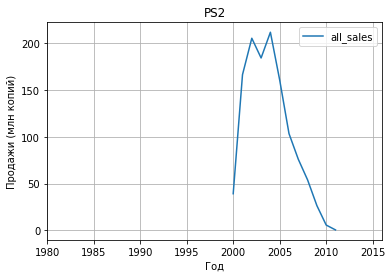

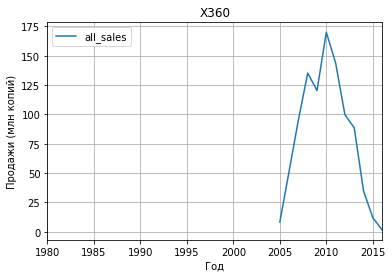

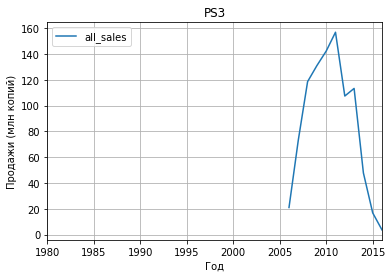

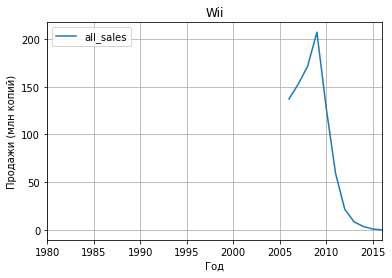

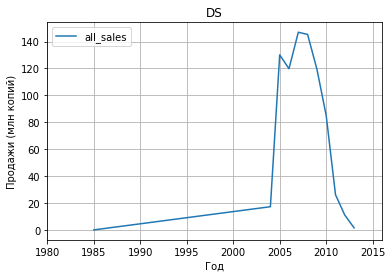

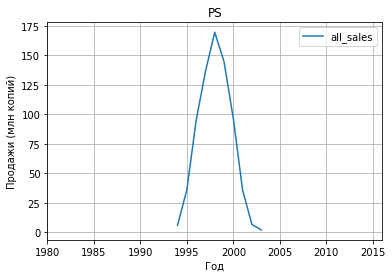

In [23]:
# построим аналогичные графики с продажами
for pl in list:
    ax = data.query('platform == @pl').groupby('year_of_release').agg({'all_sales': 'sum'}).plot(grid=True)
    ax.set_xlim(1980, 2016)
    plt.title(pl)
    plt.ylabel('Продажи (млн копий)')
    plt.xlabel('Год')
    plt.show()

Видим аналогичную картину.

Возьмем период 4 года *2013-2016* гг. и вычеркнем из него последний год. Получается, актуальный период, с которым мы будем работать, *2012-2015* гг.

Я вычернула последний год, так как заметила, что для всех платформ продажи за *2016* сильно снизились. Это может быть связано с тем, что не все данные за текущий год собраны. К тому же, в условиях проекта сказано, что сейчас декабрь *2016* года. Если это *1* декабря, то в данных за текущий год отсутствуют продажи как минимум за целый месяц - декабрь (месяц предновогодних распродаж и месяц перед новогодними каникулами, когда самое время покупать новые игры).

В конце описания проекта написано, что данные за *2016* год могут быть неполными, так что всё верно.

2016 год не будет учитываться только при анализе продаж по периодам (отображение графиков будет по 2015 год). В дальнейших исследованиях 2016 год будет учтен, поэтому срез сделан с 2013 года (без ограничения "сверху").

### Создание среза за актуальный период

In [24]:
# сделаем срез за актуальный период для удобства исследования
actual_data = data.query('year_of_release >= 2014')

In [25]:
actual_data.shape[0] # проверим размер нового датасета

1689

### Анализ продаж по платформам за актуальный период

In [26]:
# посмотрим продажи разных платформ за актуальный период
#actual_data.groupby('platform').agg({'all_sales': 'sum'}).sort_values(ascending=False)
actual_data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: all_sales, dtype: float64

Лидирующими по продажам платформами за последние годы являются *PS4* (*288* млн проданных копий) и *XOne* (*140.36* млн проданных копий).

Более *50* млн проданных копий имеют платформы: *3DS, PS3*.

Более *10* млн проданных копий имеют платформы: *X360, WiiU, PC, PSV*.

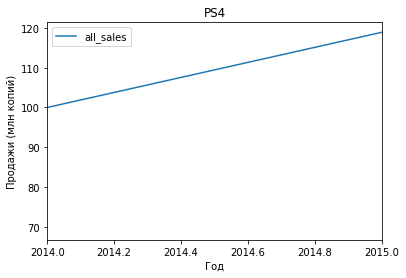

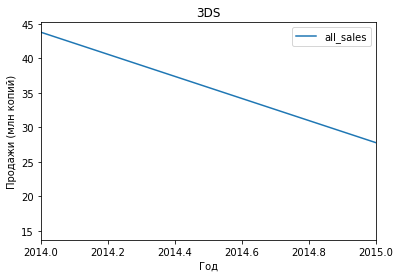

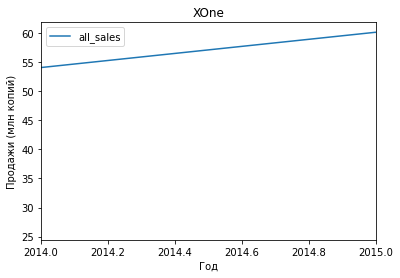

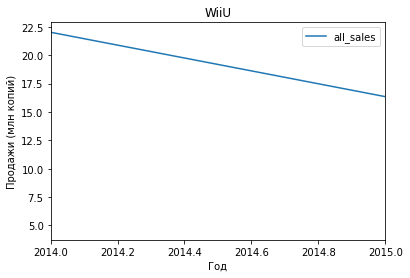

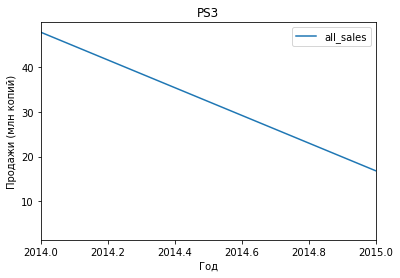

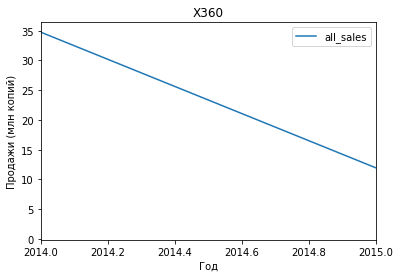

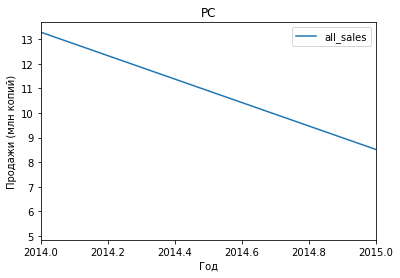

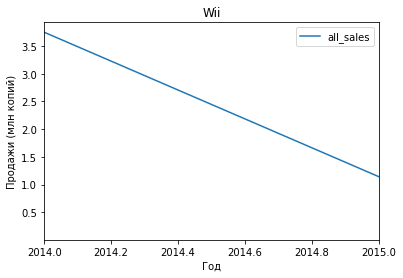

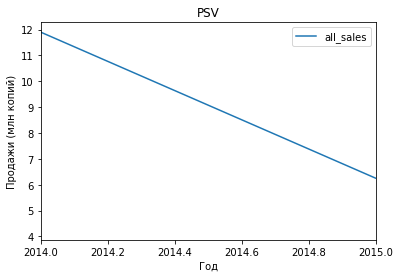

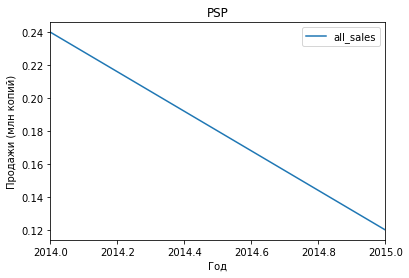

In [27]:
# посмотрим, какие платформы лидируют по продажам, какие растут или падают
for pl in actual_data['platform'].unique():
    ax = actual_data.query('platform == @pl').groupby('year_of_release').agg({'all_sales': 'sum'}).plot()
    ax.set_xlim(2014, 2015)
    plt.title(pl)
    plt.ylabel('Продажи (млн копий)')
    plt.xlabel('Год')
    plt.show()

Продажи растут у следующих платформ:
1. PS4 (со 100 млн проданных копий в 2014 году до 120 млн копий в 2015)
2. XOne (с 54 млн проданных копий в 2014 году до 60 млн копий в 2015)

Лидерами продаж за последние годы стали следующие платформы:
1. *PS4* (за *2014-2015* годы было продано ~220 млн копий);
2. *XOne* (за *2014-2015* годы было продано ~114 млн копий);
3. *3DS* (за *2014-2015* годы было продано ~72 млн копий).

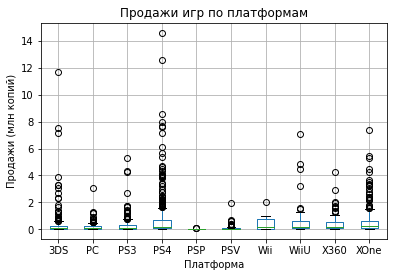

In [28]:
# построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
actual_data.boxplot(column='all_sales', by='platform', grid=True)
plt.suptitle('')
plt.title('Продажи игр по платформам')
plt.ylabel('Продажи (млн копий)')
plt.xlabel('Платформа')
plt.show()

По боксплотам видно, что у медианные продажи игр, 25-й и 75-й квартили на всех платформах очень маленькие и очень много выбросов. Либо с графиком что-то не так, либо в датасете очень много сильно маленьких значений.

Чтобы проверить это, выведем последние строки одной из платформ - *3DS*.

In [29]:
# рассмотрим платформу 3DS, выведем последние строки
actual_data.query('platform == "3DS"').tail(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
14890,One Piece: Daikaizoku Coliseum,3DS,2016.0,Fighting,0.00,0.00,0.03,0.0,NaN,NaN,NaN,0.03
14892,The Legend of Korra (3DS),3DS,2014.0,Strategy,0.02,0.00,0.00,0.0,NaN,NaN,NaN,0.02
14910,Harvest Moon: Skytree Village,3DS,2016.0,Simulation,0.02,0.00,0.00,0.0,NaN,7.4,E,0.02
14983,Beyblade Burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.0,NaN,NaN,NaN,0.03
15202,Thomas and Friends: Steaming around Sodor,3DS,2015.0,Action,0.00,0.02,0.00,0.0,NaN,NaN,NaN,0.02
15211,Phoenix Wright: Ace Attorney Trilogy,3DS,2014.0,Adventure,0.00,0.00,0.02,0.0,81.0,9.0,T,0.02
15521,Tenkai Knights: Brave Battle,3DS,2014.0,Action,0.01,0.01,0.00,0.0,26.0,2.4,E10+,0.02
15524,Devil Survivor: Over Clock,3DS,2015.0,Strategy,0.00,0.00,0.02,0.0,NaN,NaN,NaN,0.02
15530,Downtown Nekketsu Jidaigek,3DS,2015.0,Action,0.00,0.00,0.02,0.0,NaN,NaN,NaN,0.02
15611,Niko Puchi Girls Runway,3DS,2015.0,Misc,0.00,0.00,0.02,0.0,NaN,NaN,NaN,0.02


Действительно есть очень много игр с практически нулевыми продажами.

Попробуем удалить из actual_data все игры с общими продажами меньше или равно 1 млн копий.

In [30]:
actual_data2 = actual_data.query('all_sales > 1')

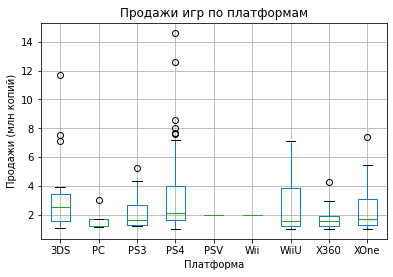

In [31]:
# построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
actual_data2.boxplot(column='all_sales', by='platform', grid=True)
plt.suptitle('')
plt.title('Продажи игр по платформам')
plt.ylabel('Продажи (млн копий)')
plt.xlabel('Платформа')
plt.show()

Картина изменилась. Стали видны "ящики с усами".

Теперь у всех платформ медианные продажи одной игры равны 1.5-2.5 млн копий.
Самые высокие 75 квартили оказались у платформ *PS4* (4 млн копий), *WiiU* (3.9 млн копий). 
Самые высокие нормальные значения (верхняя граница "усов") у следующих платформ:

Платформа | Верхняя граница норм. зн-й продаж
:-------- | :----------------------------------------
PS4       | 7 млн копий
WiiU      | 7 млн копий
XOne      | 5.5 млн копий
PS3       | 4.5 млн копий
3DS       | 4 млн копий
X360      | 3 млн копий

### Зависимость продаж от оценок критиков

Оценим зависимость продаж от оценок критиков и пользователей на примере популярной платформы *PS4*.

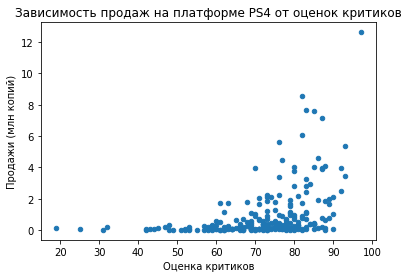

In [32]:
# построим диаграмму рассеяния продаж на платформе PS4 в зависимости от отзывов критиков
actual_data.query('platform == "PS4"').plot.scatter(x = 'critic_score', y = 'all_sales')
plt.title('Зависимость продаж на платформе PS4 от оценок критиков')
plt.ylabel('Продажи (млн копий)')
plt.xlabel('Оценка критиков')
plt.show()

In [33]:
actual_data.query('platform == "PS4"')['critic_score'].corr(actual_data.query('platform == "PS4"')['all_sales'])

0.40266141068104083

Коэффициент корреляции между оценками критиков и продажами для платформы *PS4* равен ~0.4, что значит, что есть корреляция между указанными параметрами, т.е. продажи зависят от оценок критиков: чем выше оценка критиков, тем больше будут средние продажи.

Диаграмма рассеяния подтверждает этот вывод.

### Зависимость продаж от оценок пользователей

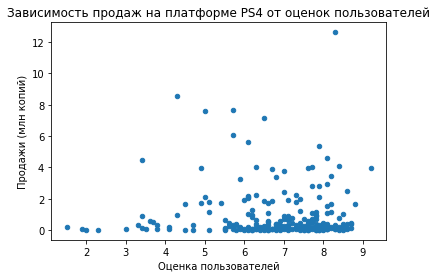

In [34]:
# построим диаграмму рассеяния продаж на платформе PS4 в зависимости от отзывов пользователей
actual_data.query('platform == "PS4"').plot.scatter(x = 'user_score', y = 'all_sales')
plt.title('Зависимость продаж на платформе PS4 от оценок пользователей')
plt.ylabel('Продажи (млн копий)')
plt.xlabel('Оценка пользователей')
plt.show()

In [35]:
actual_data.query('platform == "PS4"')['user_score'].corr(actual_data.query('platform == "PS4"')['all_sales'])

-0.040131589472697356

Коэффициент корреляции между оценками критиков и продажами для платформы *PS4* равен -0.04. Корреляция между оценками пользователей и продажами близка к нулю. Т.е. продажи не зависят от оценок пользователей.

Думаю, для остальных платформ корреляции будут аналогичными. Построим матрицу корреляции, чтобы проверить это.

In [36]:
pd.DataFrame(actual_data, columns=['all_sales', 'critic_score', 'user_score']).corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.328105,-0.01307
critic_score,0.328105,1.000000,0.50446
user_score,-0.013070,0.504460,1.00000


Как видно, продажи по всем платформам зависят от оценок критиков на ~33%, а от оценок пользователей стремится к нулю. Т.е. зависимость продаж от оценок критиков есть, но небольшая, а зависимости от оценок пользователей нет.

### Общее распределение игр по жанрам

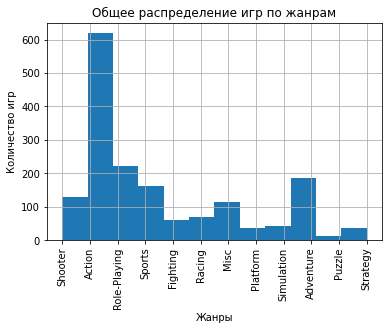

In [37]:
# посмотрим на общее распределение игр по жанрам
actual_data['genre'].hist(xrot=90, bins=12)
plt.title('Общее распределение игр по жанрам')
plt.ylabel('Количество игр')
plt.xlabel('Жанры')
plt.show()

In [38]:
g1 = actual_data.groupby('genre')['genre'].count().sort_values(ascending=False)
g1

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

Больше всего игр в жанре *Action* (619), на втором месте по популярности жанр *Role-Playing* (221 игра), на третьем - *Adventure* (185 игр). Самым непопулярным жанром оказался *Puzzle* (14 выпущенных игр).

### Анализ продаж по жанрам

In [39]:
# теперь посмотрим на самые прибыльные жанры
g2 = actual_data.groupby('genre')['all_sales'].median().sort_values(ascending=False)
g2

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: all_sales, dtype: float64

In [40]:
g1.corr(g2)

-0.020650738618718526

Самое большое кол-во выпущенных игр:
1. *Action* (619 игр)
2. *Role-Playing* (221 игра)
3. *Adventure* (185 игр)

Самыми популярными оказались жанры:
1. *Shooter* (игра в среднем имеет 515 тыс. проданных копий)
2. *Sports* (игра в среднем имеет 180 тыс. проданных копий)
3. *Platform* (игра в среднем имеет 140 тыс. проданных копий)

Есть корреляция в 77.5% между самыми продаваемыми и самыми выпускаемыми жанрами.

Самым популярным во всех отношениях жанром оказался *Action*.

### Вывод

1. Был произведен подсчет количества выпущенных игр, начиная с 1980 года и заканчивая 2016.

Период    | Кол-во выпущенных игр
:-------- | :-------------------
1980-1993 | на одном уровне
1993-2000 | медленно возрастает
2000-2008 | резко возрастает
2008-2012 | резко снижается
2012-2016 | на одном уровне

Пик по количеству выпущенных игр был в 2008 году (1696 игр), в то время как за последние 5 лет выпускается в среднем 500-600 игр в год. По крайней мере если говорить об играх, присутствующих в данном датасете.

2. Построен график, показывающий количество выпущенных игр в разные годы.
3. Самыми успешными с точки зрения продаж за всё время оказались следующие платформы:

Платформа | Кол-во продаж (млн копий)
:-------- | :------------------------
PS2       | 1255.77
X360      | 971.42
PS3       | 939.65
Wii       | 907.51
DS        | 806.12

4. "Cрок жизни" платформы равен примерно 10 годам. Наибольшее количество игр для конкретной платформы выпускается в середине "срока жизни" - где-то через 5 лет после выхода на рынок. 
5. В качестве актуального периода, который будет исследоваться при анализе данных по периодам, взят период за 2014-2015 годы (не учитываем 2016 год, так как данные за этот год неполные). В качестве актуального периода для оставшихся исследований взят период 2014-2016. Срез данных за 2014-2016 годы сохранен в датасет *actual_data*.
6. Лидирующими по продажам платформами за последние годы являются *PS4* (*288* млн проданных копий) и *XOne* (*140.36* млн проданных копий). Более *50* млн проданных копий имеют платформы: *3DS, PS3*. Более *10* млн проданных копий имеют платформы: *X360, WiiU, PC, PSV*.
7. Продажи растут у следующих платформ:
    1. PS4 (со 100 млн проданных копий в 2014 году до 120 млн копий в 2015)
    2. XOne (с 54 млн проданных копий в 2014 году до 60 млн копий в 2015)

8. Лидерами продаж за последние годы стали следующие платформы:
    1. *PS4* (за *2014-2015* годы было продано ~220 млн копий);
    2. *XOne* (за *2014-2015* годы было продано ~114 млн копий);
    3. *3DS* (за *2014-2015* годы было продано ~72 млн копий).
              
9. Медианы продаж одной игры по каждой платформе близки к нулю, так как очень много игр с практически нулевыми продажами. Графики "ящик с усами" в таком случае практически полностью состоят из выбросов. Если не учитывать игры с продажами менее 1 млн копий, то самые высокие нормальные значения (верхняя граница "усов" боксплота) можно увидеть у следующих платформ:

Платформа | Верхняя граница норм. зн-й продаж
:-------- | :----------------------------------------
PS4       | 7 млн копий
WiiU      | 7 млн копий
XOne      | 5.5 млн копий
PS3       | 4.5 млн копий
3DS       | 4 млн копий
X360      | 3 млн копий

10. Коэффициент корреляции между оценками критиков и продажами для платформы *PS4* равен ~0.4, что значит, что есть корреляция между указанными параметрами, т.е. продажи зависят от оценок критиков: чем выше оценка критиков, тем больше будут средние продажи. 
11. Коэффициент корреляции между оценками критиков и продажами для платформы *PS4* ~-0.04, т.е. продажи не зависят от оценок пользователей.
12. Продажи по всем платформам в среднеем зависят от оценок критиков на ~33%, а от оценок стремится к нулю. Т.е. зависимость продаж от оценок критиков есть, но небольшая, а зависимости от оценок пользователей нет.
13. Самое большое кол-во выпущенных игр:
    1. *Action* (619 игр)
    2. *Role-Playing* (221 игра)
    3. *Adventure* (185 игр)

14. Самыми популярными оказались жанры:
    1. *Shooter* (игра в среднем имеет 515 тыс. проданных копий)
    2. *Sports* (игра в среднем имеет 180 тыс. проданных копий)
    3. *Platform* (игра в среднем имеет 140 тыс. проданных копий)
15. Есть значительная корреляция в 77.5% между самыми продаваемыми и самыми выпускаемыми жанрами.

## Составление портрета пользователя каждого региона

### Самые популярные платформы

In [41]:
#найдем самые популярные платформы (топ-5) регионов NA, EU, JP
print(f"Топ 5 популярных платформ в Северной Америке:\n{actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)}\n")
print(f"Топ 5 популярных платформ в Европе:\n{actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)}\n")
print(f"Топ 5 популярных платформ в Японии:\n{actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)}")

Топ 5 популярных платформ в Северной Америке:
platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

Топ 5 популярных платформ в Европе:
platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

Топ 5 популярных платформ в Японии:
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64


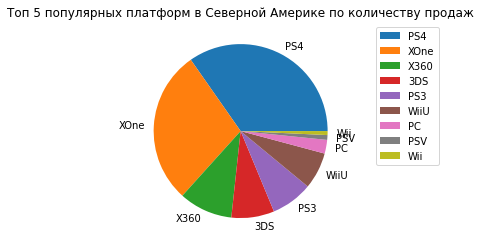

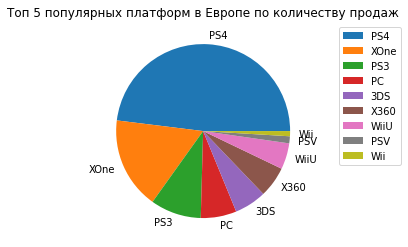

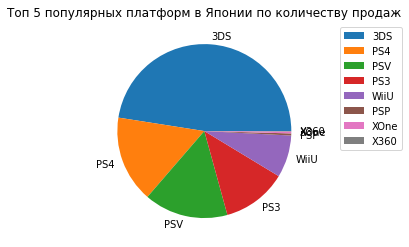

In [42]:
# построим круговые диаграммы
actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind='pie', ylabel='')
plt.title('Топ 5 популярных платформ в Северной Америке по количеству продаж')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1.0))
plt.show()

actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='pie', ylabel='')
plt.title('Топ 5 популярных платформ в Европе по количеству продаж')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1.0))
plt.show()

actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie', ylabel='')
plt.title('Топ 5 популярных платформ в Японии по количеству продаж')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1.0))
plt.show()

Топ 5 популярных платформ в Северной Америке:

Платформа | Кол-во продаж (млн копий) | Доля 
:-------- | :------------------------ | :---
PS4       | 98.61                     | 35%
XOne      | 81.27                     | 29%                  
X360      | 28.30                     | 10%
3DS       | 22.64                     | 8%
PS3       | 22.05                     | 8%

Топ 5 популярных платформ в Европе:

Платформа | Кол-во продаж (млн копий) | Доля 
:-------- | :------------------------ | :---
PS4       | 130.04                    | 48%
XOne      | 46.25                     | 17%
PS3       | 25.54                     | 9%
PC        | 17.97                     | 7%
3DS       | 16.12                     | 6%

Топ 5 популярных платформ в Японии:

Платформа | Кол-во продаж (млн копий) | Доля 
:-------- | :------------------------ | :---
3DS       | 44.24                     | 48%
PS4       | 15.02                     | 16%
PSV       | 14.54                     | 16%
PS3       | 11.22                     | 12%
WiiU      | 7.31                      | 8%

Лидирами продаж в Северной Америке и Европе являются платформы *PS4* (35-48% продаж от рынка) и *XOne* (17-29% продаж от рынка) соответственно.

В Японии платформа *PS4* оказалась на второй месте (48% продаж от рынка), а пеервое заняла *3DS* (16% продаж от рынка).

### Самые популярные жанры

In [43]:
#найдем самые популярные жанры (топ-5) регионов NA, EU, JP
print(f"Топ 5 популярных жанров в Северной Америке:\n{actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)}\n")
print(f"Топ 5 популярных жанров в Европе:\n{actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)}\n")
print(f"Топ 5 популярных жанров в Японии:\n{actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)}")

Топ 5 популярных жанров в Северной Америке:
genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

Топ 5 популярных жанров в Европе:
genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

Топ 5 популярных жанров в Японии:
genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64


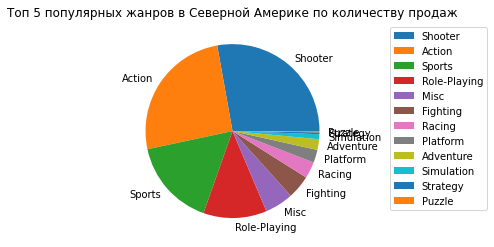

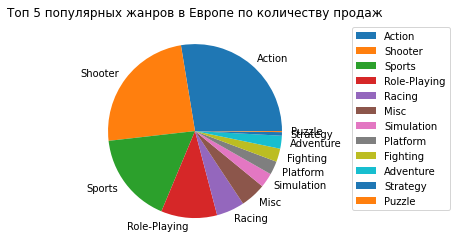

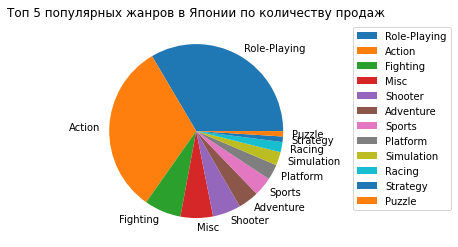

In [44]:
# построим круговые диаграммы
actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind='pie', ylabel='')
plt.title('Топ 5 популярных жанров в Северной Америке по количеству продаж')
plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1.0))
plt.show()

actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot(kind='pie', ylabel='')
plt.title('Топ 5 популярных жанров в Европе по количеству продаж')
plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1.0))
plt.show()

actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie', ylabel='')
plt.title('Топ 5 популярных жанров в Японии по количеству продаж')
plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1.0))
plt.show()

Топ 5 популярных жанров в Северной Америке:

Жанр         | Кол-во продаж (млн копий) | Доля 
:----------- | :------------------------ | :---
Shooter      | 79.02                     | 28%
Action       | 72.53                     | 26%
Sports       | 46.13                     | 16%
Role-Playing | 33.47                     | 12%
Misc         | 15.05                     | 5%

Топ 5 популярных жанров в Европе:

Жанр         | Кол-во продаж (млн копий) | Доля 
:----------- | :------------------------ | :---
Action       | 74.68                     | 28%
Shooter      | 65.52                     | 24%
Sports       | 45.73                     | 17%
Role-Playing | 28.17                     | 10%
Racing       | 14.13                     | 5%

Топ 5 популярных жанров в Японии:

Жанр         | Кол-во продаж (млн копий) | Доля 
:----------- | :------------------------ | :---
Role-Playing | 31.16                     | 33%
Action       | 29.58                     | 23%
Fighting     | 6.37                      | 7%
Misc         | 5.61                      | 6%
Shooter      | 4.87                      | 5%

Топ 4 популярных жанров Северной Америки и Европы оказались полностью идентичны: первые 4 места занимают жанры *Action, Shooter, Sports, Role-Playing*. Самые популярные жанры *Action* и *Shooter* имеют 24-28% продаж от всего рынка.

У Японии самым популярным жанром стал *Role-Playing* (33%). На втором месте по популярности расположился жанр *Action* (23%).

In [45]:
# посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе
actual_data.pivot_table(values=['na_sales', 'eu_sales', 'jp_sales'], index='rating', aggfunc=['sum', 'count', 'mean'])

sum                      count                        mean  \
       eu_sales jp_sales na_sales eu_sales jp_sales na_sales  eu_sales   
rating                                                                   
E         58.06     8.94    50.74      219      219      219  0.265114   
E10+      26.16     4.46    33.23      185      185      185  0.141405   
M         93.44     8.01    96.42      265      265      265  0.352604   
T         34.07    14.78    38.95      271      271      271  0.125720   

                            
        jp_sales  na_sales  
rating                      
E       0.040822  0.231689  
E10+    0.024108  0.179622  
M       0.030226  0.363849  
T       0.054539  0.143727

Представлены следующие рейтинги:
1. E - для всех
2. E10+ - от 10 лет
3. M - от 17 лет
4. T - от 13 лет

Продажи игр в Северной Америке:

ESRB | Расшифровка | Всего продаж (млн копий) | Продаж с одной игры (тыс. копий)
:--- | :---------- | :----------------------- | :------------------------------
E    | для всех    | 50.74                    | 232
E10+ | от 10 лет   | 33.23                    | 180
M    | от 13 лет   | 96.42                    | 364
T    | от 17 лет   | 38.95                    | 144

Продажи игр в Европе:

ESRB | Расшифровка | Всего продаж (млн копий) | Продаж с одной игры (тыс. копий)
:--- | :---------- | :----------------------- | :------------------------------
E    | для всех    | 58.06                    | 265
E10+ | от 10 лет   | 26.16                    | 141
M    | от 13 лет   | 93.44                    | 353
T    | от 17 лет   | 34.07                    | 126

Продажи игр в Японии:

ESRB | Расшифровка | Всего продаж (млн копий) | Продаж с одной игры (тыс. копий)
:--- | :---------- | :----------------------- | :------------------------------
E    | для всех    | 8.94                     | 41
E10+ | от 10 лет   | 4.46                     | 27
M    | от 13 лет   | 8.01                     | 30
T    | от 17 лет   | 14.78                    | 55

В Северной Америке большее всего продаются игры с рейтингом M (от 13 лет), в Европе -  с рейтингом E (для всех), а в Японии лидирующую позицию занимаются игры с рейтингом T (от 17 лет).

### Вывод

1. Лидирами продаж в Северной Америке и Европе являются платформы *PS4* (35-48% продаж от рынка) и *XOne* (17-29% продаж от рынка) соответственно. В Японии платформа *PS4* оказалась на второй месте (48% продаж от рынка), а пеервое заняла *3DS* (16% продаж от рынка).

2. Топ 4 популярных жанров Северной Америки и Европы оказались полностью идентичны: первые 4 места занимают жанры *Action, Shooter, Sports, Role-Playing*. Самые популярные жанры *Action* и *Shooter* имеют 24-28% продаж от всего рынка. У Японии самым популярным жанром стал *Role-Playing* (33%). На втором месте по популярности расположился жанр *Action* (23%).

3. В Северной Америке большее всего продаются игры с рейтингом M (от 13 лет), в Европе -  с рейтингом E (для всех), а в Японии лидирующую позицию занимаются игры с рейтингом T (от 17 лет).

## Проверка гипотез

### Гипотеза "средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Используем гипотезу о равенстве средних двух генеральных совокупностей, так как необходимо сравнить средние двух независимых совокупностей.

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [46]:
# проверим гипотезу "средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(actual_data.query('platform == "XOne"')['user_score'], actual_data.query('platform == "PC"')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


Нельзя утверждать, что между средними пользовательскими рейтингами платформ Xbox One и PC есть значимые различия.

### Гипотеза "средние пользовательские рейтинги жанров Action и Sports разные"

Используем гипотезу о равенстве средних двух генеральных совокупностей, так как необходимо сравнить средние двух независимых совокупностей.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

In [47]:
# проверим гипотезу "средние пользовательские рейтинги жанров Action и Sports разные"

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(actual_data.query('genre == "Action"')['user_score'], actual_data.query('genre == "Sports"')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports имеют значимые различия.

Для проверки обеих гипотез, заключенных в сравнении средних значений метрики в группах, был использован критерий Стьюдента (t-тест), так как для сравнения средних для средней и большой выборок и используется данный критерий.

### Вывод

1. Нельзя утверждать, что между средними пользовательскими рейтингами платформ Xbox One и PC есть значимые различия.
2. Средние пользовательские рейтинги жанров Action и Sports имеют значимые различия.

## Общий вывод

Были проведены следующие действия: данные выгружены из файла в датасет, названия столбцов были приведены к нижнему регистру, проведены проверки на пропуски и дубликаты, строки с пропусками в определенным столбцах были удалены, были описаны возможные причины пропусков, типы  данных заменены на более удобные, выбран актуальный перид для проведения исследований, построены и исследованы графики по продажам, изучены зависимости продаж от оценок критиков и пользователей, рассчитана общая сумма продаж, построен портрет пользователя каждого региона, проверены гипотезы о пользовательских рейтингах определенных платформ и жанров.

### Краткий вывод

1. Прогноз составлялся на основе данных за последние 2 года.
2. "Срок жизни" одной платформы составляют приблизительно 10 лет. Пик продаж наступает через 5 лет после старта платформы, после чего идет на спад.
3. Среди растущих и потенциально прибыльных платформ можно выделить *PS4* и *XOne*.
4. Самыми популярными жанрами в Америки и Европе являются жанры  *Action*, *Shooter* и *Sports*.
7. Самым популярным жанром в Японии оказался Role-Playing.
8. Продажи зависят от оценок критиков на 33%. Оценки пользователей не влияют на продажи.
9. Средние пользовательские рейтинги разных платформ не имеют существенных различий.
10. Средние пользовательские рейтинги разных жанров игр могут существенно различаться.
11. Самые часто выпускаемые жанры являются и самыми продаваемыми.
12. Существует очень много игр с практически нулевыми продажами.
13. За последние 2 года самыми успешными с точки зрения продаж платформами PS4, XOne, 3DS. 
14. В Северной Америке большее всего продаются игры с рейтингом M (от 13 лет), в Европе -  с рейтингом E (для всех), а в Японии лидирующую позицию занимаются игры с рейтингом T (от 17 лет).

### Подробный вывод

1. Предобработка данных:
- Названия столбцов были приведены к нижнему регистру.
- Пропуски в столбцах *name, genre, year_of_release* были удалены.
- В столбце *user_score* тип данных *object* был заменен на *float64*.
- Была проведена проверка на явные полные и неполные дубликаты (по столбцам *name, platform, year_of_release*), а также на неявные дубликаты в столбцах *game, genre, platform*. Найденные 2 явных неполных дубликата были удалены.
- В *data* был добавлен столбец *all_sales*, равный сумме продаж со всех регионов.
- Была проведена проверка того, что все изменения сработали.
- К пропускам в данных могли привести следующие причины:
    1. Отсутствие полной информации о некоторых играх (давно вышедших или непопулярных).
    2. Отсутствие определенного показателя для некоторых игр (рейтинга ESRB для игр, выпущенных в Азии, оценок пользователей и критиков для непопулярных игр).
    3. Человеческий фактор (например, информация была случайно удалена оператором).

2. Исследовательский анализ данных:
- Был произведен подсчет количества выпущенных игр, начиная с 1980 года и заканчивая 2016.

Период    | Кол-во выпущенных игр
:-------- | :-------------------
1980-1993 | на одном уровне
1993-2000 | медленно возрастает
2000-2008 | резко возрастает
2008-2012 | резко снижается
2012-2016 | на одном уровне

Пик по количеству выпущенных игр был в 2008 году (1696 игр), в то время как за последние 5 лет выпускается в среднем 500-600 игр в год. По крайней мере если говорить об играх, присутствующих в данном датасете.

- Построен график, показывающий количество выпущенных игр в разные годы.
- Самыми успешными с точки зрения продаж за всё время оказались следующие платформы:

Платформа | Кол-во продаж (млн копий)
:-------- | :------------------------
PS2       | 1255.77
X360      | 971.42
PS3       | 939.65
Wii       | 907.51
DS        | 806.12

- "Cрок жизни" платформы равен примерно 10 годам. Наибольшее количество игр для конкретной платформы выпускается в середине "срока жизни" - где-то через 5 лет после выхода на рынок. 
- В качестве актуального периода, который будет исследоваться при анализе данных по периодам, взят период за 2014-2015 годы (не учитываем 2016 год, так как данные за этот год неполные). В качестве актуального периода для оставшихся исследований взят период 2014-2016. Срез данных за 2014-2016 годы сохранен в датасет *actual_data*.
- Лидирующими по продажам платформами за последние годы являются *PS4* (*288* млн проданных копий) и *XOne* (*140.36* млн проданных копий). Более *50* млн проданных копий имеют платформы: *3DS, PS3*. Более *10* млн проданных копий имеют платформы: *X360, WiiU, PC, PSV*.
- Продажи растут у следующих платформ:
    1. PS4 (со 100 млн проданных копий в 2014 году до 120 млн копий в 2015)
    2. XOne (с 54 млн проданных копий в 2014 году до 60 млн копий в 2015)
- Лидерами продаж за последние годы стали следующие платформы:
    1. *PS4* (за *2014-2015* годы было продано ~220 млн копий);
    2. *XOne* (за *2014-2015* годы было продано ~114 млн копий);
    3. *3DS* (за *2014-2015* годы было продано ~72 млн копий).            
- Медианы продаж одной игры по каждой платформе близки к нулю, так как очень много игр с практически нулевыми продажами. Графики "ящик с усами" в таком случае практически полностью состоят из выбросов. Если не учитывать игры с продажами менее 1 млн копий, то самые высокие нормальные значения (верхняя граница "усов" боксплота) можно увидеть у следующих платформ:

Платформа | Верхняя граница норм. зн-й продаж
:-------- | :----------------------------------------
PS4       | 7 млн копий
WiiU      | 7 млн копий
XOne      | 5.5 млн копий
PS3       | 4.5 млн копий
3DS       | 4 млн копий
X360      | 3 млн копий

- Коэффициент корреляции между оценками критиков и продажами для платформы *PS4* равен ~0.4, что значит, что есть корреляция между указанными параметрами, т.е. продажи зависят от оценок критиков: чем выше оценка критиков, тем больше будут средние продажи. 
- Коэффициент корреляции между оценками критиков и продажами для платформы *PS4* ~-0.04, т.е. продажи не зависят от оценок пользователей.
- Продажи по всем платформам в среднеем зависят от оценок критиков на ~33%, а от оценок стремится к нулю. Т.е. зависимость продаж от оценок критиков есть, но небольшая, а зависимости от оценок пользователей нет.
- Самое большое кол-во выпущенных игр:
    1. *Action* (619 игр)
    2. *Role-Playing* (221 игра)
    3. *Adventure* (185 игр)

- Самыми популярными оказались жанры:
    1. *Shooter* (игра в среднем имеет 515 тыс. проданных копий)
    2. *Sports* (игра в среднем имеет 180 тыс. проданных копий)
    3. *Platform* (игра в среднем имеет 140 тыс. проданных копий)
- Есть значительная корреляция в 77.5% между самыми продаваемыми и самыми выпускаемыми жанрами.
                    
3. Составление портрета пользователя
- Топ 5 популярных платформ в Северной Америке:

Платформа | Кол-во продаж (млн копий) | Доля 
:-------- | :------------------------ | :---
PS4       | 98.61                     | 35%
XOne      | 81.27                     | 29%                  
X360      | 28.30                     | 10%
3DS       | 22.64                     | 8%
PS3       | 22.05                     | 8%

- Топ 5 популярных платформ в Европе:

Платформа | Кол-во продаж (млн копий) | Доля 
:-------- | :------------------------ | :---
PS4       | 130.04                    | 48%
XOne      | 46.25                     | 17%
PS3       | 25.54                     | 9%
PC        | 17.97                     | 7%
3DS       | 16.12                     | 6%

- Топ 5 популярных платформ в Японии:

Платформа | Кол-во продаж (млн копий) | Доля 
:-------- | :------------------------ | :---
3DS       | 44.24                     | 48%
PS4       | 15.02                     | 16%
PSV       | 14.54                     | 16%
PS3       | 11.22                     | 12%
WiiU      | 7.31                      | 8%

- Топ 5 популярных жанров в Северной Америке:

Жанр         | Кол-во продаж (млн копий) | Доля 
:----------- | :------------------------ | :---
Shooter      | 79.02                     | 28%
Action       | 72.53                     | 26%
Sports       | 46.13                     | 16%
Role-Playing | 33.47                     | 12%
Misc         | 15.05                     | 5%

- Топ 5 популярных жанров в Европе:

Жанр         | Кол-во продаж (млн копий) | Доля 
:----------- | :------------------------ | :---
Action       | 74.68                     | 28%
Shooter      | 65.52                     | 24%
Sports       | 45.73                     | 17%
Role-Playing | 28.17                     | 10%
Racing       | 14.13                     | 5%

- Топ 5 популярных жанров в Японии:

Жанр         | Кол-во продаж (млн копий) | Доля 
:----------- | :------------------------ | :---
Role-Playing | 31.16                     | 33%
Action       | 29.58                     | 23%
Fighting     | 6.37                      | 7%
Misc         | 5.61                      | 6%
Shooter      | 4.87                      | 5%

- Продажи игр в Северной Америке:

ESRB | Расшифровка | Всего продаж (млн копий) | Продаж с одной игры (тыс. копий)
:--- | :---------- | :----------------------- | :------------------------------
E    | для всех    | 50.74                    | 232
E10+ | от 10 лет   | 33.23                    | 180
M    | от 13 лет   | 96.42                    | 364
T    | от 17 лет   | 38.95                    | 144

- Продажи игр в Европе:

ESRB | Расшифровка | Всего продаж (млн копий) | Продаж с одной игры (тыс. копий)
:--- | :---------- | :----------------------- | :------------------------------
E    | для всех    | 58.06                    | 265
E10+ | от 10 лет   | 26.16                    | 141
M    | от 13 лет   | 93.44                    | 353
T    | от 17 лет   | 34.07                    | 126

- Продажи игр в Японии:

ESRB | Расшифровка | Всего продаж (млн копий) | Продаж с одной игры (тыс. копий)
:--- | :---------- | :----------------------- | :------------------------------
E    | для всех    | 8.94                     | 41
E10+ | от 10 лет   | 4.46                     | 27
M    | от 13 лет   | 8.01                     | 30
T    | от 17 лет   | 14.78                    | 55

4. Проверка гипотез
- Нельзя утверждать, что между средними пользовательскими рейтингами платформ Xbox One и PC есть значимые различия.
- Средние пользовательские рейтинги жанров Action и Sports имеют значимые различия.
- Для проверки обеих гипотез, заключенных  в сравнении средних значений метрики в группах, был использован критерий Стьюдента (t-тест).